Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
os.chdir(r'C:\Users\91973\Desktop\Data\Kaggle\Titanic')
os.listdir()

['.ipynb_checkpoints',
 'Artificial Neural Nets_Titanic.csv',
 'First_Submission.csv',
 'First_Submission_RF.csv',
 'First_Submission_xgboost.csv',
 'gender_submission.csv',
 'test.csv',
 'Titanic_LR.ipynb',
 'train.csv']

Loading the data

In [3]:
data = pd.read_csv('train.csv')

Examining the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The data has 891 observations and 12 variables including the response variable. The data has 5 categorical variables and 7 numerical variables.
There are some missing values in the data.

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

3 variables have missing values in the data set. 'Sex','cabin' and 'Embarked'

Let us have a brief idea about the spread of the data

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.Age.min()

0.42

In [8]:
data.loc[data.Age == 0.42]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


In [9]:
data.Age.sort_values()

803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
       ... 
859     NaN
863     NaN
868     NaN
878     NaN
888     NaN
Name: Age, Length: 891, dtype: float64

In [10]:
data.loc[data.Age < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


Let us change the age for to a whole number instead of float for the above observations

In [12]:
data.loc[(data.Age<1),'Age'] = 1

In [13]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.701681,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.521395,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

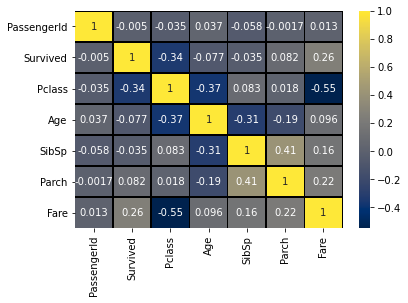

In [14]:
sns.heatmap(data.corr(),linecolor='black',linewidths=0.5,cmap='cividis',annot=True)

Let us visualize few attributes with respect to the response variable

<AxesSubplot:xlabel='Sex', ylabel='count'>

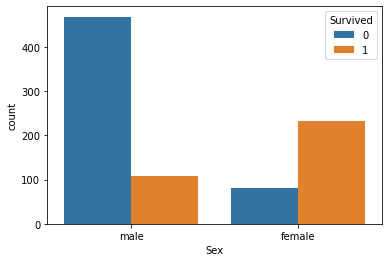

In [33]:
sns.countplot(x='Sex',data=data,hue='Survived')

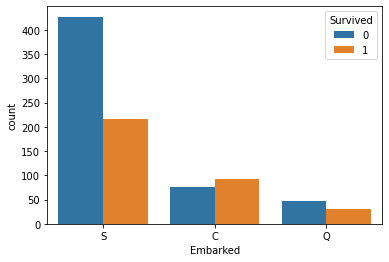

In [32]:
sns.countplot(x='Embarked',data=data,hue='Survived');

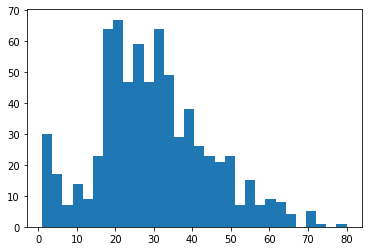

In [39]:
plt.hist(x='Age',bins=30,data=data);

The 'Age' attribute appears to be somewhat normally distributed. Most of the people on Titanic were between the age of 18-50

<AxesSubplot:xlabel='Survived', ylabel='count'>

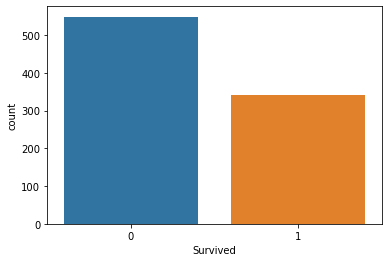

In [40]:
sns.countplot(x='Survived',data=data)

In [41]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

The Target variable 'Survived' is not imbalanced. 

Some of the variables does not add any meaningful value to the analysis hence removing the same

In [43]:
var_to_remove = ['PassengerId','Name','Ticket','Cabin']

In [44]:
data_cleaned = data.drop(columns=var_to_remove)

In [45]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


The data has now 8 attributes

Separating the Target variable from the data

In [46]:
Target_var = ['Survived']

In [47]:
x = data_cleaned.drop(columns=Target_var)
y = data_cleaned[Target_var]

Splitting the data into Training and Test data sets

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [50]:
x_train.isnull().sum()

Pclass        0
Sex           0
Age         132
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

For 'Age' we will use the avearge Age to fill the missing values and for 'Embarked' we will use the most occured instance

In [51]:
x_train.Age = x_train.Age.fillna(value=np.mean(x_train.Age))

C:\Users\91973\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [52]:
x_train.Embarked.value_counts()

S    491
C    117
Q     58
Name: Embarked, dtype: int64

In [53]:
x_train.Embarked = x_train.Embarked.fillna(value='S')

C:\Users\91973\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [55]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
298,1,male,29.42444,0,0,30.5000,S
884,3,male,25.00000,0,0,7.0500,S
247,2,female,24.00000,0,2,14.5000,S
478,3,male,22.00000,0,0,7.5208,S
305,1,male,1.00000,1,2,151.5500,S


We Need to encode two Categorical Variables : 'Sex' and 'Embarked'

In [56]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
One_enc = OneHotEncoder(sparse=False)

In [58]:
var_to_enc = ['Sex','Embarked']

In [59]:
enc_x_train = One_enc.fit_transform(x_train[var_to_enc])
enc_x_train = pd.DataFrame(enc_x_train,index=x_train.index)
enc_x_train.columns = One_enc.get_feature_names(input_features=var_to_enc)
x_train = pd.concat([x_train,enc_x_train],axis=1)
x_train.drop(columns=var_to_enc,inplace=True)

#### Training our first Model - Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

In [63]:
LogReg = LogisticRegression(max_iter=500)

In [68]:
model = LogReg.fit(x_train,y_train.values.ravel())

In [69]:
model.score(x_train,y_train.values.ravel())

0.8023952095808383

Let us check the performance of the model on the Test data

In [70]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,male,NaN,1,1,15.2458,C
439,2,male,31.0,0,0,10.5000,S
840,3,male,20.0,0,0,7.9250,S
720,2,female,6.0,0,1,33.0000,S
39,3,female,14.0,1,0,11.2417,C


We will use the same procedure as we followed for x_train to transform and prepare Test data

In [71]:
x_test.isnull().sum()

Pclass       0
Sex          0
Age         45
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [72]:
x_test.Age = x_test.Age.fillna(value=np.mean(x_test.Age))

C:\Users\91973\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [73]:
enc_x_test = One_enc.fit_transform(x_test[var_to_enc])
enc_x_test = pd.DataFrame(enc_x_test,index=x_test.index)
enc_x_test.columns = One_enc.get_feature_names(input_features=var_to_enc)
x_test = pd.concat([x_test,enc_x_test],axis=1)
x_test.drop(columns=var_to_enc,inplace=True)

Let's predict the Test results and compare them with the actual Test set results

In [74]:
y_pred = model.predict(x_test)

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [77]:
cm = confusion_matrix

In [78]:
cm(y_test,y_pred)

array([[115,  19],
       [ 24,  65]], dtype=int64)

In [79]:
accuracy_score(y_test,y_pred)

0.8071748878923767

In [80]:
precision_score(y_test,y_pred)

0.7738095238095238

In [81]:
recall_score(y_test,y_pred)

0.7303370786516854

For Kaggle Submission

In [82]:
test_data = pd.read_csv('test.csv')

In [83]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


we will make a copy of the test_data set

In [84]:
df_test = test_data.copy()

In [85]:
df_test.drop(columns=var_to_remove,inplace=True)

In [86]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [87]:
df_test.Age = df_test.Age.fillna(value=np.mean(df_test.Age))
df_test.Fare = df_test.Fare.fillna(value=np.mean(df_test.Fare))

In [88]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [89]:
enc_df_test = One_enc.fit_transform(df_test[var_to_enc])
enc_df_test = pd.DataFrame(enc_df_test,index=df_test.index)
enc_df_test.columns = One_enc.get_feature_names(input_features=var_to_enc)
df_test = pd.concat([df_test,enc_df_test],axis=1)
df_test.drop(columns=var_to_enc,inplace=True)

In [90]:
y_pred_test = model.predict(df_test)

In [95]:
submission = pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':y_pred_test})

In [96]:
submission.set_index('PassengerId',inplace=True)

In [97]:
submission.to_csv('Submission_LogReg.csv')

Let us check some other models and try to increase the accuracy of the model

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
RF_classifier = RandomForestClassifier()

In [100]:
Rf_model = RF_classifier.fit(x_train,y_train.values.ravel())

In [101]:
Rf_model.score(x_train,y_train.values.ravel())

0.9805389221556886

In [102]:
y_pred_Rf = Rf_model.predict(x_test)

In [103]:
cm(y_pred_Rf,y_test)

array([[109,  23],
       [ 25,  66]], dtype=int64)

In [104]:
accuracy_score(y_pred_Rf,y_test)

0.7847533632286996

In [105]:
precision_score(y_pred_Rf,y_test)

0.7415730337078652

In [106]:
recall_score(y_pred_Rf,y_test)

0.7252747252747253

In [107]:
y_pred_test_Rf = Rf_model.predict(df_test)

In [108]:
submission_Rf = pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':y_pred_test_Rf})

In [109]:
submission_Rf.set_index('PassengerId',inplace=True)

In [110]:
submission_Rf.to_csv('Submission_Random_forest.csv')

Let us try and check XGboost 

In [112]:
import xgboost as xgb

In [113]:
from xgboost import XGBRFClassifier

In [116]:
XGB_Rf = XGBRFClassifier(use_label_encoder=False)

In [117]:
model_XGB = XGB_Rf.fit(x_train,y_train.values.ravel())

[17:04:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [118]:
y_predicted = model_XGB.predict(x_test)

In [119]:
y_predicted_XGB = model_XGB.predict(df_test)

In [120]:
submission_XGB = pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':y_predicted_XGB})
submission_XGB.set_index('PassengerId',inplace=True)
submission_XGB.to_csv('Submission_XGBoost.csv')